# Assignment 6 — PPO vs GRPO

Abhinav Kumar
12/14/2025

In [1]:
from pathlib import Path

Path("figures").mkdir(exist_ok=True)
Path("runs").mkdir(exist_ok=True)

print("figures/")
print("runs/")


figures/
runs/


In [2]:
from pathlib import Path

def newest_event_file(logdir: Path):
    event_files = sorted(logdir.rglob("events.out.tfevents.*"), key=lambda p: p.stat().st_mtime, reverse=True)
    return event_files[0] if event_files else None

ppo_dir = Path("runs") / "breakout_ppo"
grpo_dir = Path("runs") / "breakout_grpo"

ppo_event = newest_event_file(ppo_dir)
grpo_event = newest_event_file(grpo_dir)

print("PPO logdir:", ppo_dir, "exists:", ppo_dir.exists())
print("GRPO logdir:", grpo_dir, "exists:", grpo_dir.exists())

print("\nNewest PPO event:", ppo_event)
print("Newest GRPO event:", grpo_event)

if ppo_event is None:
    raise FileNotFoundError("No PPO event file found in runs/breakout_ppo. Run PPO first.")
if grpo_event is None:
    raise FileNotFoundError("No GRPO event file found in runs/breakout_grpo. Run GRPO first.")


PPO logdir: runs/breakout_ppo exists: True
GRPO logdir: runs/breakout_grpo exists: True

Newest PPO event: runs/breakout_ppo/events.out.tfevents.1765769054.549d66c1ea57.94580.0
Newest GRPO event: runs/breakout_grpo/events.out.tfevents.1765770618.549d66c1ea57.2243.0


In [3]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def load_scalar(event_path, tag):
    ea = EventAccumulator(str(event_path))
    ea.Reload()
    tags = ea.Tags().get("scalars", [])
    if tag not in tags:
        print("\nAvailable tags:")
        for t in tags:
            print(" -", t)
        raise ValueError(f"Tag '{tag}' not found in {event_path}. Pick one from the list above.")
    vals = ea.Scalars(tag)
    x = [v.step for v in vals]
    y = [v.value for v in vals]
    return x, y

# Reward tag used by your baseline notebook(s)
reward_tag = "Average_Reward/all_envs"

ppo_x, ppo_y = load_scalar(ppo_event, reward_tag)
grpo_x, grpo_y = load_scalar(grpo_event, reward_tag)

print("PPO points:", len(ppo_y), "last:", ppo_y[-1] if ppo_y else None)
print("GRPO points:", len(grpo_y), "last:", grpo_y[-1] if grpo_y else None)


PPO points: 15 last: 1.0
GRPO points: 15 last: 1.0


In [4]:
PPO_T = 32
PPO_NB_ACTOR = 2

ppo_steps = [it * (PPO_T * PPO_NB_ACTOR) for it in ppo_x]

grpo_steps_proxy = grpo_x

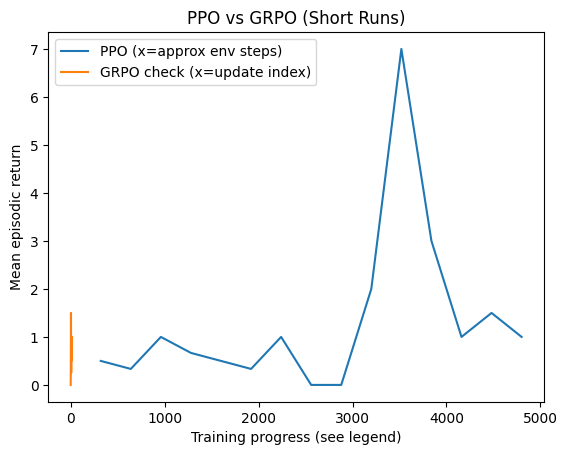

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ppo_steps, ppo_y, label="PPO (x=approx env steps)")
plt.plot(grpo_steps_proxy, grpo_y, label="GRPO check (x=update index)")
plt.xlabel("Training progress (see legend)")
plt.ylabel("Mean episodic return")
plt.title("PPO vs GRPO (Short Runs)")
plt.legend()
plt.show()


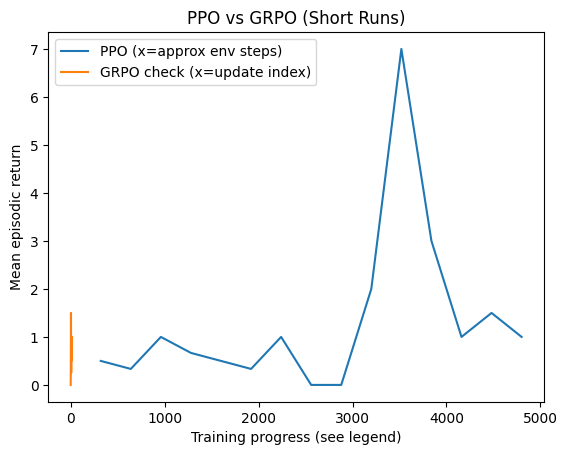

Saved: /workspaces/eng-ai-agents/assignments/assignment-6/figures/ppo_vs_grpo.png


In [6]:
from pathlib import Path
import matplotlib.pyplot as plt

out = Path("figures") / "ppo_vs_grpo.png"

plt.figure()
plt.plot(ppo_steps, ppo_y, label="PPO (x=approx env steps)")
plt.plot(grpo_steps_proxy, grpo_y, label="GRPO check (x=update index)")
plt.xlabel("Training progress (see legend)")
plt.ylabel("Mean episodic return")
plt.title("PPO vs GRPO (Short Runs)")
plt.legend()
plt.savefig(out, dpi=200, bbox_inches="tight")
plt.show()

print("Saved:", out.resolve())
